<a href="https://colab.research.google.com/github/gustikresna/purwadhika-assignment/blob/main/Modul_3_Exercise_13_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, silhouette_score
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
housing = pd.read_csv('housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
housing.shape

(20640, 10)

In [ ]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [ ]:
housing = housing.dropna()

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
X = housing.copy().drop('ocean_proximity', axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

K-Means

In [ ]:
sil_score = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X_scaled)
  sil_score.append(silhouette_score(X_scaled, kmeans.labels_, metric='euclidean'))

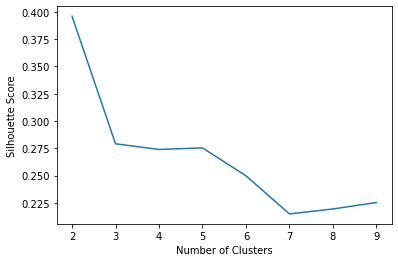

In [ ]:
sns.lineplot(x=range(2,10), y=sil_score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

DBSCAN

In [ ]:
epsilon = [i for i in [5,10]]
min_samples = [i for i in [5,10]]

In [ ]:
dbscan = DBSCAN(eps=15, min_samples=100)
dbscan.fit(X_scaled)
label = dbscan.labels_
silhouette_score(X_scaled, label)

0.8926588445669601

In [ ]:
for e in epsilon:
  for s in min_samples:
    dbscan = DBSCAN(eps=e, min_samples=s)
    dbscan.fit(X_scaled)

    print('\neps ={}.'.format(e))
    print('min_sample ={}'.format(s))

    label = dbscan.fit_predict(X_scaled)
    print('score = {}'.format(silhouette_score(X_scaled, label)))




eps =5.
min_sample =5
score = 0.8834331354793897

eps =5.
min_sample =10
score = 0.8779953268012441

eps =10.
min_sample =5
score = 0.8908786203296513

eps =10.
min_sample =10
score = 0.8908786203296513


In [ ]:
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(X_scaled)

DBSCAN(algorithm='auto', eps=5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)